In [5]:
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt

## Ejercicio 1)

### Apartado a y b)

In [16]:
# Coeficientes de la función objetivo: c = [1, -1] para x1 - x2
c = [1, -1]

# Coeficientes de las restricciones (lado izquierdo)
A = [
    [1, -1],  # x1 - x2 <= 2
    [1, 1]    # x1 + x2 <= 6
]

# Lado derecho de las restricciones
b = [2, 6]

# Límite inferior de las variables: x1 >= 0, x2 >= 0
x_bounds = (0, None)
bounds = [x_bounds, x_bounds]

# Resolver el problema
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Mostrar resultados
if res.success:
    print("Valor óptimo de la función objetivo:", res.fun)
    print("Valores óptimos de las variables: x1 =", res.x[0], ", x2 =", res.x[1])
else:
    print("No se pudo encontrar una solución óptima.")


Valor óptimo de la función objetivo: -6.0
Valores óptimos de las variables: x1 = 0.0 , x2 = 6.0


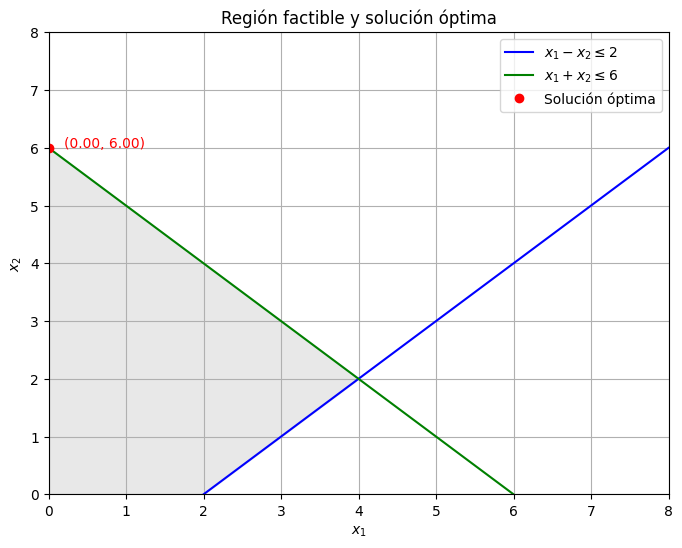

In [ ]:
# 2. Relleno de la región factible
x1_vals = np.linspace(0, 8, 100) # Gráfico de 0 a 8, con 100 de resolución
x2_1 = x1_vals - 2       # De x1 - x2 ≤ 2 → x2 ≥ x1 - 2
x2_2 = 6 - x1_vals       # De x1 + x2 ≤ 6 → x2 ≤ 6 - x1

x2 = np.maximum(x1_vals - 2, 0) # eliminar negativos
x2_upper = np.minimum(6 - x1_vals, 10)

# Crear plot
plt.figure(figsize=(8, 6))

# Dibujar lineas
plt.plot(x1_vals, x2_1, label=r'$x_1 - x_2 \leq 2$', color='blue')
plt.plot(x1_vals, x2_2, label=r'$x_1 + x_2 \leq 6$', color='green')

# Rellenar región factible
plt.fill_between(x1_vals, x2, x2_upper, where=(x2 <= x2_upper), color='lightgrey', alpha=0.5)

# 3. Mostrar la solución óptima
if res.success:
    x_opt = res.x
    # dibujar punto
    plt.plot(x_opt[0], x_opt[1], 'ro', label='Solución óptima')
    # Coordenadas al lado del punto
    plt.text(x_opt[0] + 0.2, x_opt[1], f'({x_opt[0]:.2f}, {x_opt[1]:.2f})', color='red')

# 4. Configurar gráfico
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Región factible y solución óptima')
plt.legend()
plt.grid(True)
plt.show()

### Apartado c)

In [31]:
# Coeficientes de la función objetivo: c = [1, -1] para x1 - x2
c = [-1, -1]

# Coeficientes de las restricciones (lado izquierdo)
A = [
    [-2, 1],  # x1 - x2 <= 2
    [1, -1]    # x1 + x2 <= 6
]

# Lado derecho de las restricciones
b = [1, 1]

# Límite inferior de las variables: x1 >= 0, x2 >= 0
x_bounds = (0, None)
bounds = [x_bounds, x_bounds]

# Resolver el problema
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method='highs')

# Mostrar resultados
if res.success:
    print("Valor óptimo de la función objetivo:", res.fun)
    print("Valores óptimos de las variables: x1 =", res.x[0], ", x2 =", res.x[1])
else:
    print("No se pudo encontrar una solución óptima.")

No se pudo encontrar una solución óptima.


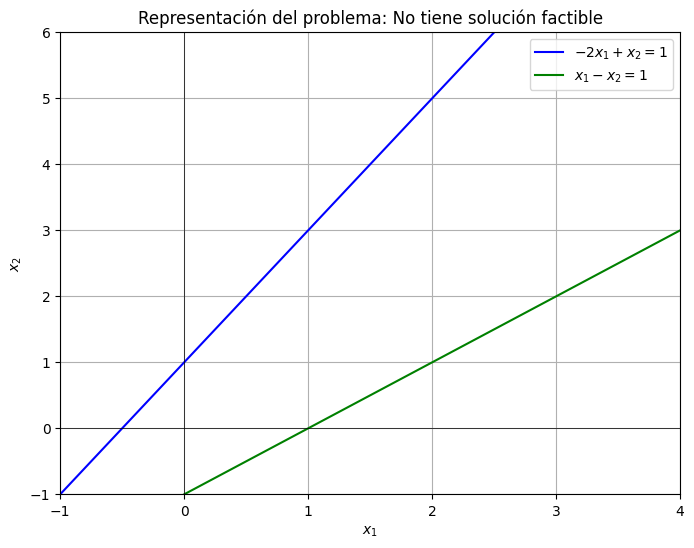

In [ ]:
# Crear el espacio de x1
x1 = np.linspace(-1, 4, 400)

# Ecuaciones de las restricciones de igualdad
x2_eq1 = 2 * x1 + 1    # De -2x1 + x2 = 1 → x2 = 2x1 + 1
x2_eq2 = x1 - 1        # De x1 - x2 = 1 → x2 = x1 - 1

# Crear la figura
plt.figure(figsize=(8, 6))

# Dibujar las restricciones como líneas
plt.plot(x1, x2_eq1, label=r'$-2x_1 + x_2 = 1$', color='blue')
plt.plot(x1, x2_eq2, label=r'$x_1 - x_2 = 1$', color='green')

# Marcar la región válida (donde x1, x2 >= 0)
plt.xlim(-1, 4)
plt.ylim(-1, 6)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Representación del problema: No tiene solución factible')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.grid(True)
plt.legend()

# Mostrar gráfico
plt.show()


## Ejercicio 8

In [30]:
from pyomo.environ import AbstractModel, ConcreteModel, Set, Param, Var, NonNegativeReals, Constraint, Objective, minimize, Suffix
from pyomo.opt import SolverFactory

### Modelo Concreto

In [ ]:
# Crear el modelo concreto
mTransport = ConcreteModel(name='Transportation Problem')

# Definir las ciudades de origen (i) y destino (j)
mTransport.i = Set(initialize=['Vigo', 'Algeciras'], doc='origins')
mTransport.j = Set(initialize=['Madrid', 'Barcelona', 'Valencia'], doc='destinations')

# Parámetro: capacidad de cada origen
mTransport.pA = Param(mTransport.i, initialize={
    'Vigo': 350,
    'Algeciras': 700
}, doc='origin capacity')

# Parámetro: demanda de cada destino
mTransport.pB = Param(mTransport.j, initialize={
    'Madrid': 400,
    'Barcelona': 450,
    'Valencia': 150
}, doc='destination demand')

# Parámetro: costo unitario de transporte de origen a destino
# S
TransportationCost = {
    ('Vigo', 'Madrid'): 0.06,
    ('Vigo', 'Barcelona'):  0.12,
    ('Vigo', 'Valencia'):   0.09,
    ('Algeciras', 'Madrid'):    0.05,
    ('Algeciras', 'Barcelona'): 0.15,
    ('Algeciras', 'Valencia'):  0.11
}
mTransport.pC = Param(mTransport.i, mTransport.j, initialize=TransportationCost, doc='Coste de transporte x unidad')

# Variables: cantidad transportada de i a j
mTransport.vX = Var(mTransport.i, mTransport.j, bounds=(0.0, None), doc='Unidades transportadas', within=NonNegativeReals)

# Restricción 1: capacidad de cada origen
def eCapacity(m, i):
    return sum(m.vX[i, j] for j in m.j) <= m.pA[i]

mTransport.eCapacity = Constraint(mTransport.i, rule=eCapacity, doc='maximum capacity of each origin')

# Restricción 2: demanda de cada destino
def eDemand(m, j):
    return sum(m.vX[i, j] for i in m.i) == m.pB[j]

mTransport.eDemand = Constraint(mTransport.j, rule=eDemand, doc='demand supply at destination')

# Función objetivo: minimizar el costo total de transporte
def eCost(m):
    return sum(m.pC[i, j] * m.vX[i, j] for i in m.i for j in m.j)

mTransport.eCost = Objective(rule=eCost, sense=minimize, doc='transportation cost')

# Resolver
solver = SolverFactory('glpk')
results = solver.solve(mTransport)

# print("\n=== Resultado óptimo ===")
# for i in mTransport.i:
#     for j in mTransport.j:
#         valor = mTransport.vX[i, j].value
#         if valor > 0:
#             print(f"Enviar {valor} unidades de {i} a {j}")

# print(f"\nCosto total mínimo: {mTransport.eCost():.2f}")
results.write()
mTransport.vX.display()



# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 93.5
  Upper bound: 93.5
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 12
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  Termination condition: optimal
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: 0
      Number of created subproblems: 0
  Error rc: 0
  Time: 0.009578943252563477
# ----------------------------------------------------------
#   Solution Information
# -------------------------------------

### Modelo Abstracto

In [ ]:
from pyomo.environ import *

# Crear modelo abstracto
model = AbstractModel(name="Problema de Transporte")

# Conjuntos
model.i = Set(doc="Orígenes")
model.j = Set(doc="Destinos")

# Parámetros
model.pA = Param(model.i, within=NonNegativeReals, doc="Capacidad de origen")
model.pB = Param(model.j, within=NonNegativeReals, doc="Demanda de destino")
model.pC = Param(model.i, model.j, within=NonNegativeReals, doc="Costo de transporte x unidad")

# Variables
model.vX = Var(model.i, model.j, within=NonNegativeReals, doc="Unidades transportadas")

# eCapacity y eDemand son importados de la anterior implementación
model.eCapacity = Constraint(model.i, rule=eCapacity)
model.eDemand = Constraint(model.j, rule=eDemand)

# Función objetivo: minimizar el costo total de transporte
def eCost(model):
    return sum(model.pC[i, j] * model.vX[i, j] for i in model.i for j in model.j)
model.eCost = Objective(rule=eCost, sense=minimize)


In [ ]:
from pyomo.environ import *
from pyomo.opt import SolverFactory

# Cargar modelo y datos
modelInst = model.create_instance('datos_transporte.dat')

# Resolver
solver = SolverFactory('glpk')
results = solver.solve(modelInst)

# Mostrar resultados
print("\n=== Resultado óptimo ===")
for i in modelInst.i:
    for j in modelInst.j:
        valor = modelInst.vX[i, j].value
        if valor > 0:
            print(f"Enviar {valor:.2f} unidades de {i} a {j}")

print(f"\nCosto total mínimo: {modelInst.eCost():.2f}")

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write C:\Users\augus\AppData\Local\Temp\tmp52cg9pea.glpk.raw --wglp C:\Users\augus\AppData\Local\Temp\tmppnmcnq2t.glpk.glp
 --cpxlp C:\Users\augus\AppData\Local\Temp\tmpqmwq1ie5.pyomo.lp
Reading problem data from 'C:\Users\augus\AppData\Local\Temp\tmpqmwq1ie5.pyomo.lp'...
5 rows, 6 columns, 12 non-zeros
48 lines were read
Writing problem data to 'C:\Users\augus\AppData\Local\Temp\tmppnmcnq2t.glpk.glp'...
37 lines were written
GLPK Simplex Optimizer, v4.65
5 rows, 6 columns, 12 non-zeros
Preprocessing...
5 rows, 6 columns, 12 non-zeros
Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled
Constructing initial basis...
Size of triangular part is 5
      0: obj =   1.040000000e+02 inf =   3.000e+02 (1)
      1: obj =   1.070000000e+02 inf =   0.000e+00 (0)
*     3: obj =   9.350000000e+01 inf =   0.000e+00 (0)
OPTIMAL LP SOLUTION FOUND
Time used:  


=== Resultado óptimo ===
Enviar 350.00 unidades de Vigo a Barcelona
Enviar 400.00 unidades de Algeciras a Madrid
Enviar 100.00 unidades de Algeciras a Barcelona
Enviar 150.00 unidades de Algeciras a Valencia

Costo total mínimo: 93.50
